C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 680ms/step


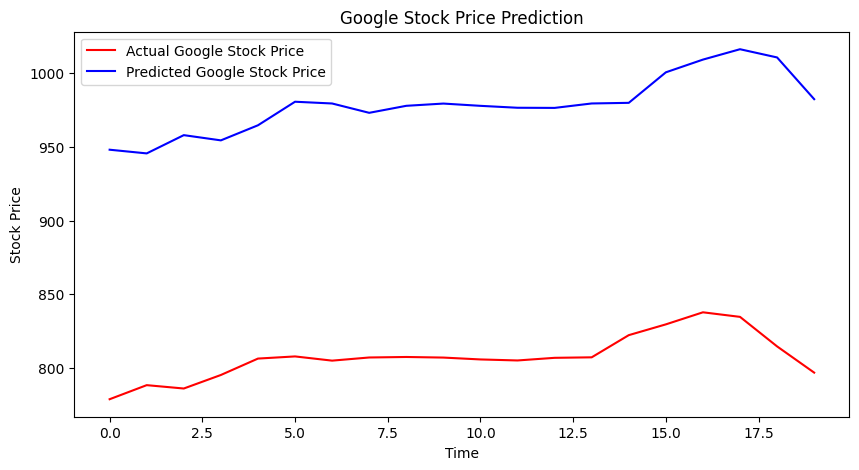

OSError: Cannot save file into a non-existent directory: '\mnt\data'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load the trained model
model_path = "google_stock_price_model.h5"
model = load_model(model_path)

# Load the test dataset
test_data_path = "Google_Stock_Price_Test.csv"
test_data = pd.read_csv(test_data_path)
real_stock_price = test_data.iloc[:, 1:2].values  # Assuming 'Open' price is at index 1

# Load the training dataset to normalize test data
train_data_path = "Google_Stock_Price_Train.csv"
train_data = pd.read_csv(train_data_path)
total_data = pd.concat((train_data['Open'], test_data['Open']), axis=0)

# Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data.iloc[:, 1:2])

test_inputs = total_data[len(total_data) - len(test_data) - 60:].values

test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

# Prepare test data for LSTM model
X_test = []
for i in range(60, 80):  # 20 test data points (from 60 previous time steps)
    X_test.append(test_inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)  # Reverse scaling

# Plot real vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(real_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Save the predictions
predictions_df = pd.DataFrame(predicted_stock_price, columns=['Predicted_Price'])
predictions_df.to_csv("/mnt/data/Predicted_Google_Stock_Price.csv", index=False)

print("Prediction completed and saved as 'Predicted_Google_Stock_Price.csv'")
